# Analyzing books related to Data science

# Overview :

**This project uses the Data science books dataset available on Kaggle https://www.kaggle.com/datasets/die9origephit/amazon-data-science-books.**
### The dataset contains 946 books obtained from scraping Amazon books related to data science, statistics, data analysis, Python, deep learning, and machine learning.

#### There are 18 columns :

- title: title of the book
- author: author (or the authors) of the book
- price: price (in dollars)
- pages: number of pages
- avg_reviews: average reviews (out of 5)
- n_reviews: reviews done for each book
- star5: percentage of 5 star reviews
- star4: percentage of 4 star reviews
- star3: percentage of 3 star reviews
- star2: percentage of 2 star reviews
- star1: percentage of 1 star reviews
- dimensions: size of the book (in inches)
- weight: weight (in pounds or ounces)
- language: language of the book
- publisher: publisher
- ISBN-13: ISBN_13 code
- link: link of the Amazon book
- complete_link: complete link of the Amazon book (including the domain https://amazon.com)

- ##  Loading the data 
- ##  Understanding the data
    - shape of the data
    - check column dtypes
    - check is there any null values
    
- ## Data preprocessing and feature engineering
  -  Split authors
  -  Convert weight from pounds and ounces to gr
  -  Extract publisher year from publisher
  -  Extract inch year from dimensions
  -  Remove punct from title
- ## Exploratory data analysis 
  - Authors with more than one books 
  - Correlation between features 
  - Price distrubtion
  - Whats the min avg max price 
  - Number of pages distrubtion
  - Does number of pages of a book affect the price ?
  - What's the most giving avg review ? 
  - Price vs avg_reviews
  - In what year have the most books been published ?
  - Price vs publish_year
  - Price vs weight (in gr)
- ## Clustring books by title
    - Apply TFIDF to books title
    - Find the best k for k means using Elbow method 
    - Apply kmeans clustring
    - Labling clusters
    - Tag books by titls
    - Best books in each cluster
    - Books price in each cluster
- ## Scrape reviews from amazon
- ## Summarizing reviews

In [30]:
# Preprocessing data
import pandas as pd
import numpy as np

# Clustring
from sklearn.cluster import KMeans

# NLP
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.summarization import summarize
import string
import re

# Scraping 
from bs4 import BeautifulSoup
from datetime import datetime
import requests
import logging

# Data visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from termcolor import cprint
import seaborn as sns
import warnings

# Visualization setup
sns.set(style="darkgrid",color_codes=True)
warnings.filterwarnings('ignore')
%matplotlib inline

# Amazon color palette
colorS = ['#FEBD69','#232F3E','#37475A','#131A22'] 

## Loading the data 

In [2]:
df = pd.read_csv('final_book_dataset_kaggle.csv')

## Understanding the data
- shape of the data
- check column dtypes
- check is there any null values

In [58]:
print("Shape of the data :",df.shape)
cprint('*'*42,'yellow')  
df.head()

Shape of the data : (946, 24)
******************************************


,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,...,publisher,ISBN_13,link,complete_link,author2,publish_year,size,cluster,tag,rate_rank
0,becoming a data head how to think speak and un...,Alex J. Gutman,24.49,272.0,4.6,184,0.74,0.18,0.05,0.02,...,Wiley; 1st edition (April 23 2021),978-1119741749,/Becoming-Data-Head-Understand-Statistics/dp/1...,https://www.amazon.com/Becoming-Data-Head-Unde...,Jordan Goldmeier,2021.0,9.0,data science,statistics,5.0
1,ace the data science interview 201 real interv...,Nick Singh,26.00,301.0,4.5,599,0.77,0.10,0.06,0.03,...,Ace the Data Science Interview (August 16 2021),978-0578973838,/Ace-Data-Science-Interview-Questions/dp/05789...,https://www.amazon.com/Ace-Data-Science-Interv...,Kevin Huo,2021.0,10.0,data science,data science,6.0
2,fundamentals of data engineering plan and buil...,Joe Reis,50.76,446.0,5.0,33,0.96,0.04,0.00,0.00,...,OReilly Media; 1st edition (July 26 2022),978-1098108304,/Fundamentals-Data-Engineering-Robust-Systems/...,https://www.amazon.com/Fundamentals-Data-Engin...,Matt Housley,2022.0,9.0,data analysis,data engineer,1.0
3,essential math for data science take control o...,Thomas Nield,44.80,347.0,4.5,27,0.79,0.05,0.05,0.05,...,OReilly Media; 1st edition (July 5 2022),978-1098102937,/Essential-Math-Data-Science-Fundamental/dp/10...,https://www.amazon.com/Essential-Math-Data-Sci...,nan,2022.0,9.0,data science,linear algebra,6.0
4,data science for business what you need to kno...,Foster Provost,36.99,413.0,4.5,970,0.71,0.15,0.08,0.03,...,OReilly Media; 1st edition (September 17 2013),978-1449361327,/Data-Science-Business-Data-Analytic-Thinking/...,https://www.amazon.com/Data-Science-Business-D...,Tom Fawcett,2013.0,9.0,data science,data science,6.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          946 non-null    object 
 1   author         824 non-null    object 
 2   price          944 non-null    float64
 3   pages          934 non-null    float64
 4   avg_reviews    823 non-null    float64
 5   n_reviews      946 non-null    int64  
 6   star5          946 non-null    float64
 7   star4          946 non-null    float64
 8   star3          946 non-null    float64
 9   star2          946 non-null    float64
 10  star1          946 non-null    float64
 11  dimensions     914 non-null    object 
 12  weight         943 non-null    object 
 13  language       943 non-null    object 
 14  publisher      942 non-null    object 
 15  ISBN_13        945 non-null    object 
 16  link           946 non-null    object 
 17  complete_link  946 non-null    object 
dtypes: float64

In [5]:
df.isnull().sum()

title              0
author           122
price              2
pages             12
avg_reviews      123
n_reviews          0
star5              0
star4              0
star3              0
star2              0
star1              0
dimensions        32
weight             3
language           3
publisher          4
ISBN_13            1
link               0
complete_link      0
dtype: int64

## Data preprocessing and feature engineering
  -  Split authors
  -  Convert weight from pounds and ounces to gr
  -  Extract publisher year from publisher
  -  Extract inch year from dimensions
  -  Remove punct from title

### Split authors

In [6]:
def authors(x):
    try :
        author1 =  x.split(',')[0]
        author2 =  x.split(',')[1]
    except :
        author1 =  x.split(',')[0]
        author2 =  'nan'
    return author1,author2

In [7]:
df['author'] = df['author'].apply(lambda x : str(x).strip("[]"))

In [8]:
df['author2']  = df['author'].apply(lambda x : authors(x)[1])
df['author']  = df['author'].apply(lambda x : authors(x)[0])

In [9]:
df['author2'] 

0            Jordan Goldmeier
1                   Kevin Huo
2                Matt Housley
3                         nan
4                 Tom Fawcett
                ...          
941                       nan
942    Robert A. Stine et al.
943              Betsy Farber
944             Deborah M. Oh
945           Martin Dempster
Name: author2, Length: 946, dtype: object

### Convert weight from pounds and ounces to gr

In [10]:
def convert_weight(x):
    try:
        if x.split(' ')[1] == 'ounces':
            weight = round(float(x.split(' ')[0])*28.34952)+" gr"
        elif x.split(' ')[1] == 'pounds':
            weight = str(round(float(x.split(' ')[0])*453.59237))+" gr"
        else :
            weight = np.nan
    except:
         weight = np.nan
    return weight

In [11]:
df['weight'] = df['weight'].apply(lambda x : convert_weight(str(x)))

### Extract publisher year from publisher

In [12]:
def extract_publishYear(x):
    try:
        aa = x.split('(')[1]
        aa = aa.split(' ')[2]
        aa = int(aa[:-1])
    except:
         aa = np.nan
    return aa

In [13]:
df['publish_year'] = df['publisher'].apply(lambda x : extract_publishYear(str(x)))

### Extract inch year from dimensions

In [14]:
def extract_inch(x):
    try :
        x = round(float(x.split(' ')[4]))
    except :
        x = np.nan
    return x

In [15]:
df['size'] = df['dimensions'].apply(lambda x : extract_inch(str(x)))

### Remove punct from title

In [26]:
# Remove punct
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)


In [27]:
df['title'] = df['title'].apply(lambda x : x.lower())
df['title'] = df['title'].apply(lambda x : remove_punct(x))

## Exploratory data analysis 
  - Authors with more than one books 
  - Correlation between features 
  - Price distrubtion
  - Whats the min avg max price 
  - Number of pages distrubtion
  - Does number of pages of a book affect the price ?
  - What's the most giving avg review ? 
  - Price vs avg_reviews
  - In what year have the most books been published ?
  - Price vs publish_year
  - Price vs weight (in gr)

### Authors with more than one books

In [16]:
authorList = [*df['author'].to_list(),*df['author2'].to_list()]

In [17]:
dupListAurtor = list(list([i for i in authorList if authorList.count(i) >= 2]))

In [18]:
dupListAurtor2 = [x for x in dupListAurtor if x != 'nan']

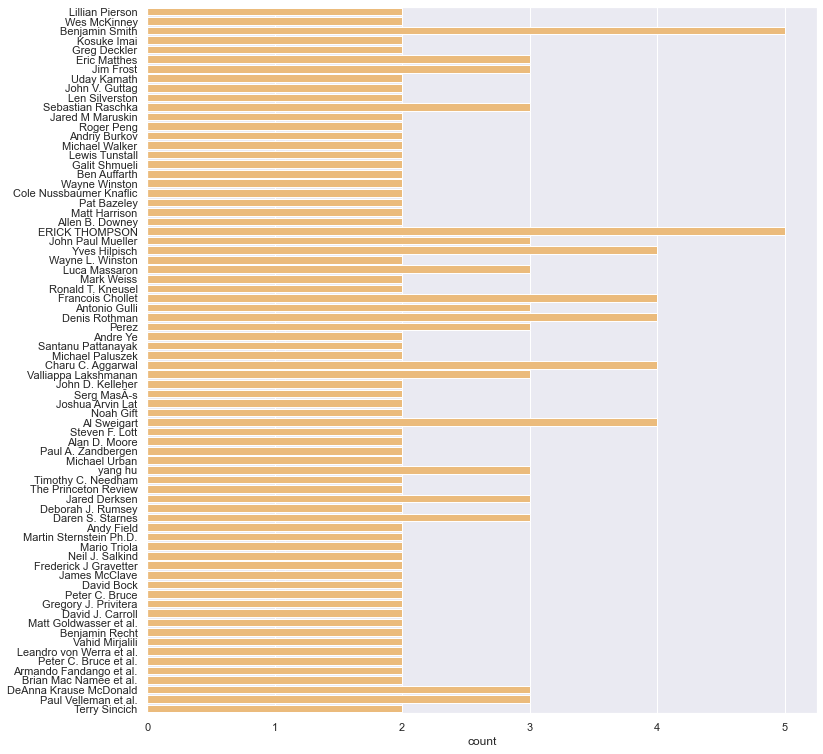

In [65]:
plt.rcParams['figure.figsize'] = (12, 13)
countplot=sns.countplot(y=dupListAurtor2, data=df,palette=["#FEBD69"])

### Correlation between features 

<AxesSubplot:>

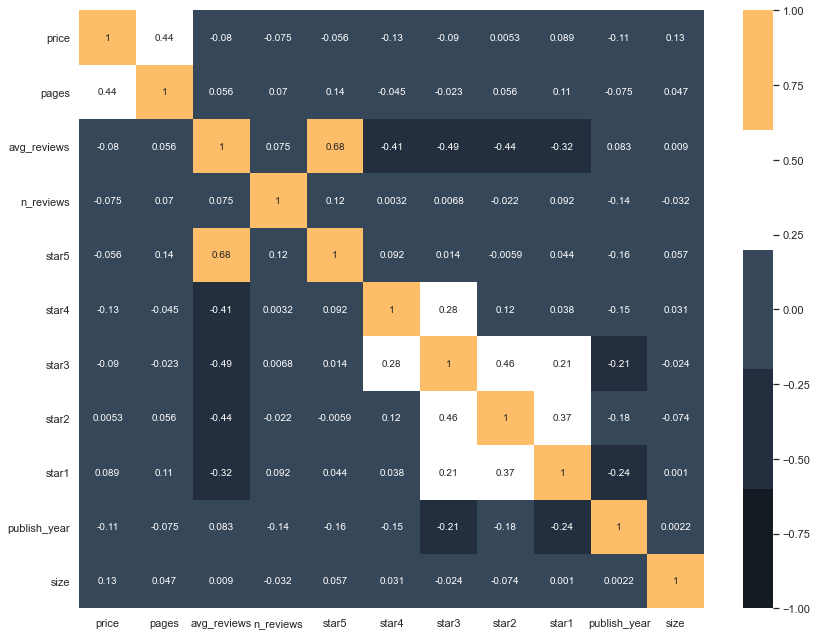

In [20]:
corr= df.corr()
plt.figure(figsize=(14,11))  
sns.heatmap(corr,annot=True, cmap=['#131A22','#232F3E','#37475A','#fff','#FEBD69'],vmax=1,vmin=-1)

### Price distrubtion
### Whats the min avg max price 

Max Price :  279.95
Mean Price :  52
Min Price :  4.73
**************************************************


<AxesSubplot:xlabel='price'>

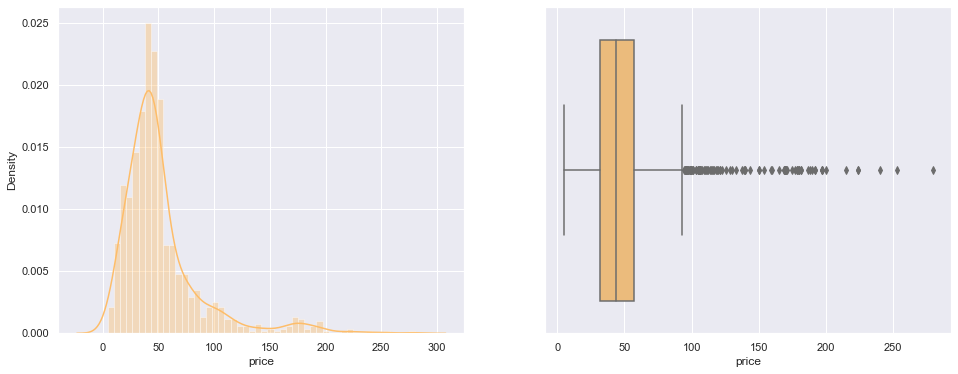

In [21]:
print('Max Price : ',df['price'].max())
print('Mean Price : ',round(df['price'].mean()))
print('Min Price : ',df['price'].min())
cprint('*'*50,'yellow')

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(16,6))
sns.distplot(df['price'],color="#FEBD69",ax=axis1)
sns.boxplot(x=df["price"],palette=["#FEBD69"],ax=axis2)

### Number of pages distrubtion
### Does number of pages of a book affect the price ?

Max pages :  1728.0
Mean pages :  419
Min pages :  48.0
**************************************************


<AxesSubplot:xlabel='pages', ylabel='Density'>

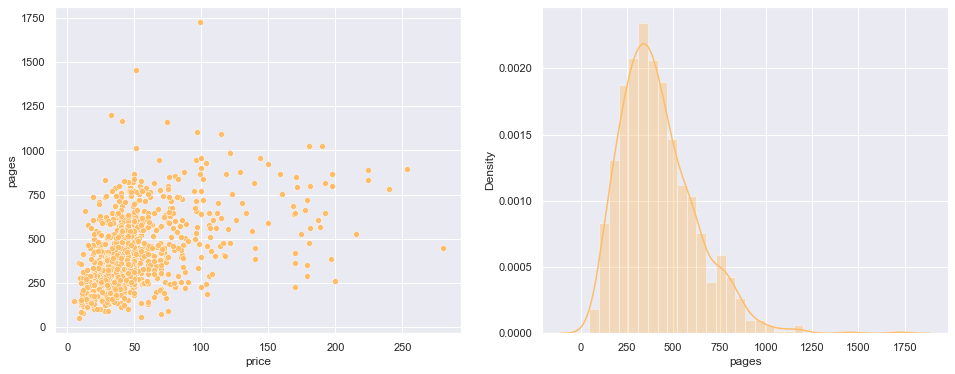

In [55]:
print('Max pages : ',df['pages'].max())
print('Mean pages : ',round(df['pages'].mean()))
print('Min pages : ',df['pages'].min())
cprint('*'*50,'yellow')

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(16,6))
sns.scatterplot(data = df,x=df["price"], y=df["pages"], color="#FEBD69",ax=axis1)

sns.distplot(df['pages'],color="#FEBD69",ax=axis2)

### What's the most giving avg review ? 
### Price vs avg_reviews

Max avg_reviews :  5.0
Mean avg_reviews :  4
Min avg_reviews :  1.0
**************************************************


<AxesSubplot:xlabel='avg_reviews', ylabel='count'>

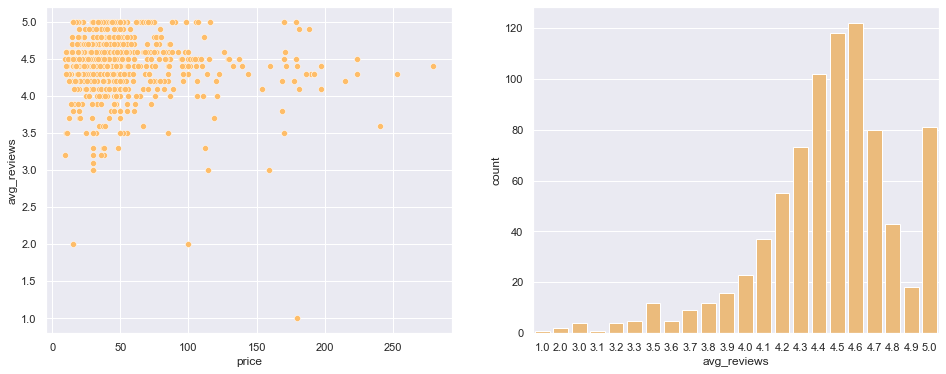

In [56]:

print('Max avg_reviews : ',df['avg_reviews'].max())
print('Mean avg_reviews : ',round(df['avg_reviews'].mean()))
print('Min avg_reviews : ',df['avg_reviews'].min())
cprint('*'*50,'yellow')

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(16,6))
sns.scatterplot(data = df,x=df["price"], y=df["avg_reviews"],color="#FEBD69",ax=axis1)

sns.countplot(df['avg_reviews'],color="#FEBD69",ax=axis2)

### In what year have the most books been published ?
### Price vs publish_year

Max publish_year :  2023.0
Mean publish_year :  2019
Min publish_year :  1972.0
**************************************************


<AxesSubplot:xlabel='count', ylabel='publish_year'>

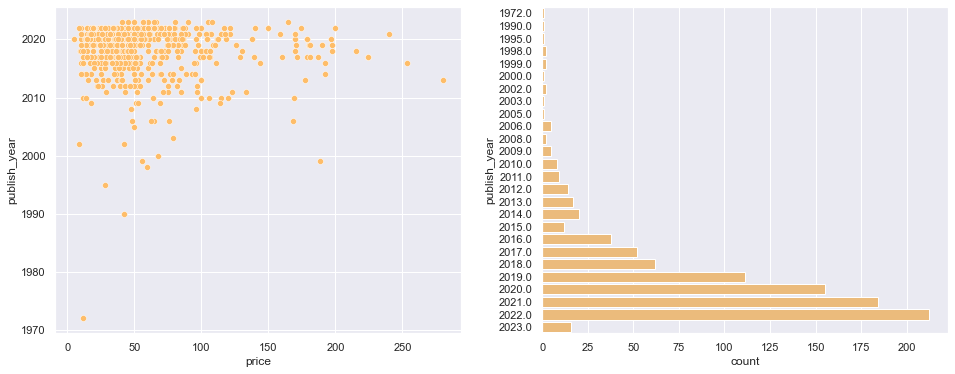

In [57]:

print('Max publish_year : ',df['publish_year'].max())
print('Mean publish_year : ',round(df['publish_year'].mean()))
print('Min publish_year : ',df['publish_year'].min())
cprint('*'*50,'yellow')

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(16,6))
sns.scatterplot(data = df,x=df["price"], y=df["publish_year"],color="#FEBD69",ax=axis1)
sns.countplot(y=df['publish_year'],color="#FEBD69",ax=axis2)

## Price vs weight (in gr)

<AxesSubplot:xlabel='weight', ylabel='price'>

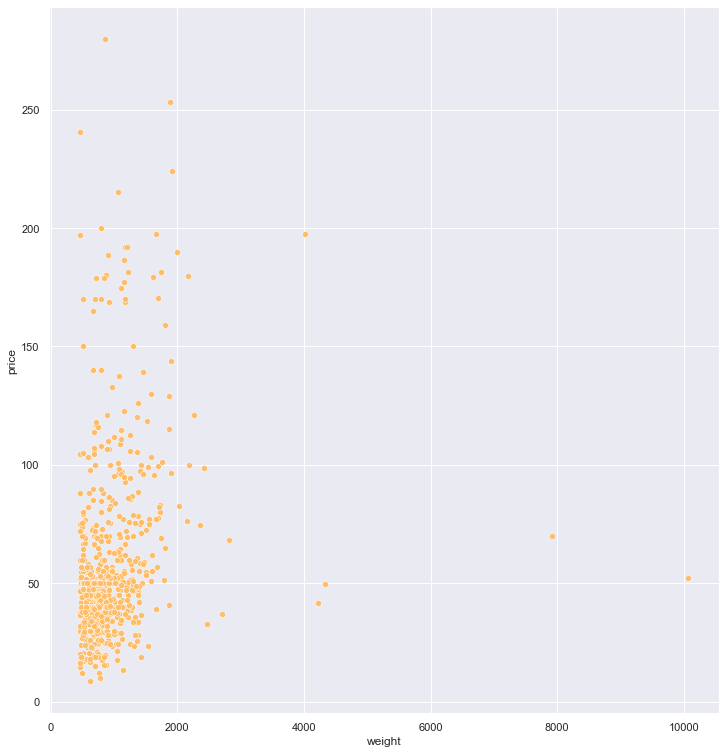

In [25]:
sns.scatterplot(data = df,y=df["price"], x=df["weight"].apply(lambda x : float(str(x).split(' ')[0])),color="#FEBD69")

## Clustring books by title
    - Apply TFIDF to books title
    - Find the best k for k means using elbow method 
    - Apply kmeans clustring
    - Labling clusters
    - Tag books by titls
    - Best books in each cluster
    - Books price in each cluster

### Apply TFIDF to books title

In [28]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2))

X = vectorizer.fit_transform(df["title"])

### Find the best k for k means using Elbow method 

In [31]:
sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=600, n_init=10)
    km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

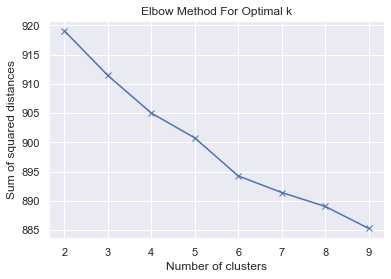

In [32]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Apply kmeans clustring

In [33]:
# Get clusters
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=600, n_init=10)
model.fit(X)

# Get prediction/ labels
labels = model.labels_
book_cl = pd.DataFrame(list(zip(df["title"],labels)),columns=['title','cluster'])
print(book_cl.sort_values(by=['cluster']))

                                                 title  cluster
945                  psychology statistics for dummies        0
844  discovering statistics using ibm spss statisti...        0
845  ap statistics flashcards fourth edition uptoda...        0
846  outline of basic statistics dictionary and for...        0
847                           essentials of statistics        0
..                                                 ...      ...
704    robust python write clean and maintainable code        5
703  mastering financial pattern recognition findin...        5
702  learn python programming an indepth introducti...        5
659      system design interview â€“ an insiders guide        5
472  deep discourse a framework for cultivating stu...        5

[946 rows x 2 columns]


In [34]:
df['cluster']= labels

### Labling clusters

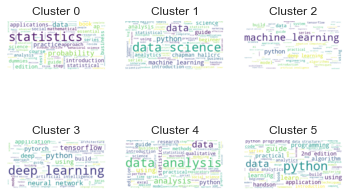

In [35]:
# Create wordclouds for clusters
for k in range(true_k):
    text = book_cl[book_cl.cluster == k]['title'].str.cat(sep=' ')
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

   # Create subplot
    plt.subplot(2, 3, k+1).set_title("Cluster " + str(k)) 
    plt.plot()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")

In [36]:
cluster_dict = {0:'programming',1:'data science',2:'deep learning',3:'machine learning',4:'math',5:'data analysis'}

In [37]:
df = df.replace({'cluster':cluster_dict})

### Tag books by titls

In [38]:
topics = ['data science','deep learning','nlp','machine learning','natural language processing','statistics','probability','linear algebra','python programming','programming','calculus','data analysis','data engineer']

In [39]:
df['tag'] = "Unclear"

In [40]:
for i in topics:
    df['tag'] = np.where(df['title'].str.contains(i),i, df['tag'])

In [41]:
df['tag'].value_counts()

Unclear                        291
machine learning               164
data analysis                  120
deep learning                  108
statistics                     103
data science                    63
programming                     50
probability                     16
natural language processing     13
data engineer                    7
calculus                         4
linear algebra                   4
nlp                              3
Name: tag, dtype: int64

In [42]:
df['cluster'].value_counts()

data analysis       326
deep learning       145
math                134
machine learning    126
data science        111
programming         104
Name: cluster, dtype: int64

### Best books in each cluster

In [43]:
df['rate_rank'] = df.groupby("cluster")["avg_reviews"].rank(method="dense", ascending=False)

In [44]:
df_best_books = df[(3 >= df['rate_rank'] )][['title','cluster','author','author2','avg_reviews','pages','publish_year','n_reviews','star5','price']].sort_values(by=['cluster','n_reviews','star5'], ascending=False)

In [52]:
df_best_books

,title,cluster,author,author2,avg_reviews,pages,publish_year,n_reviews,star5,price
933,probability and statistical inference,programming,Robert Hogg,Elliot Tanis et al.,4.9,560.0,2019.0,20,0.93,181.32
866,apâ® statistics crash course book online get ...,programming,nan,nan,4.8,272.0,2019.0,20,0.78,14.16
855,crc standard probability and statistics tables...,programming,Daniel Zwillinger,Stephen Kokoska,4.9,568.0,1999.0,6,0.90,188.73
880,statistics translated a stepstep guide to anal...,programming,Steven R. Terrell,nan,4.8,433.0,2021.0,6,0.78,55.00
141,prek12 guidelines for assessment and instructi...,programming,Anna Bargagliotti,Christine Franklin et al.,5.0,122.0,2020.0,4,1.00,15.00
...,...,...,...,...,...,...,...,...,...,...
625,text data mining,data analysis,Chengqing Zong,Rui Xia et al.,5.0,372.0,2021.0,1,1.00,29.31
698,mathematical logic through python,data analysis,Gonczarowski Yannai A.,nan,5.0,284.0,2022.0,1,1.00,29.99
719,el lenguaje de programaciã³n python de princip...,data analysis,Angel Pablo Hinojosa GutiÃ©rrez,nan,5.0,734.0,2022.0,1,1.00,18.83
767,the pythonic way an architectâ€™s guide to con...,data analysis,Sonal Raj,nan,5.0,512.0,2021.0,1,1.00,29.95


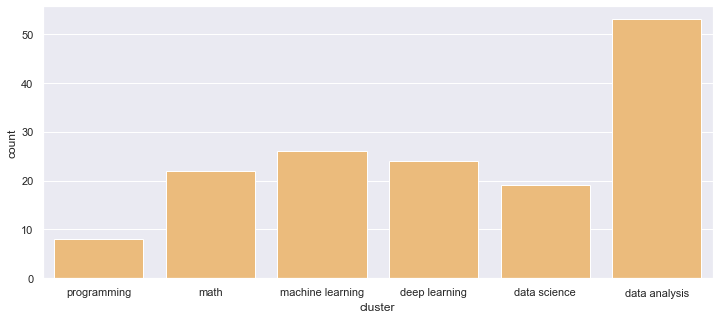

In [46]:
plt.rcParams['figure.figsize'] = (12, 5)
countplot=sns.countplot(x="cluster", data=df_best_books,palette=["#FEBD69"])

## Books price in each cluster

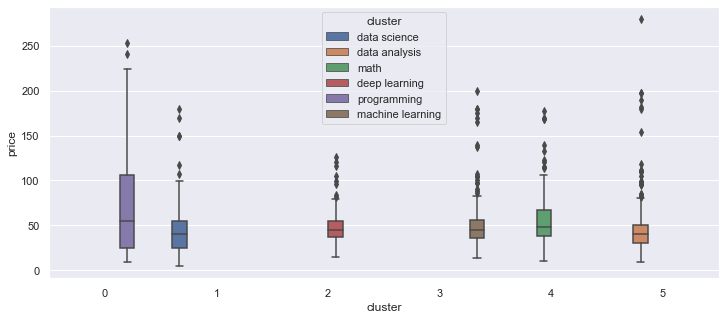

In [47]:
cluster_guide = {'programming':0,'data science':1,'deep learning':2,'machine learning':3,'math':4,'data analysis':5}

spentbox = sns.boxplot(x="cluster", y="price",data=df.replace({'cluster':cluster_guide}),hue=df['cluster'])


### Scrape reviews from amazon

In [ ]:
# Example urls
product_url = "https://www.amazon.com/Becoming-Data-Head-Understand-Statistics/dp/1119741742/"
reviews_url  = "https://www.amazon.com/Becoming-Data-Head-Understand-Statistics/product-reviews/1119741742/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"

In [ ]:
def get_review_url(product_url):
    try:
        split_url = product_url.split('dp')
        product_number = split_url[1].split('/')[1]
        review_url = split_url[0] + 'product-reviews/' + product_number + "/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"
    except:
        review_url = None
    return review_url

In [ ]:
# Create review urls for each book in dataset
df['review_urls'] = df['complete_link'].apply(lambda x: get_review_url(x))

# Remove empty review urls and create a new dataset
df_reviews = df.loc[~df['review_urls'].isnull()].reset_index()

In [ ]:
# Code adapted from Jeff James https://gist.github.com/jrjames83/4653d488801be6f0683b91eda8eeb627
headers = {
    "authority": "www.amazon.com",
    "pragma": "no-cache",
    "cache-control": "no-cache",
    "dnt": "1",
    "upgrade-insecure-requests": "1",
    "user-agent": "Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36",
    "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
    "sec-fetch-site": "none",
    "sec-fetch-mode": "navigate",
    "sec-fetch-dest": "document",
    "accept-language": "en-GB,en-US;q=0.9,en;q=0.8",
}

URLS = df_reviews['review_urls']
book_titles = df_reviews['title']

def get_page_html(page_url: str) -> str:
    resp = requests.get(page_url, headers=headers)
    return resp.text

def get_reviews_from_html(page_html: str) -> BeautifulSoup:
    soup = BeautifulSoup(page_html, "lxml")
    reviews = soup.find_all("div", {"class": "a-section celwidget"})
    return reviews

def get_review_text(soup_object: BeautifulSoup) -> str:
    review_text = soup_object.find(
        "span", {"class": "a-size-base review-text review-text-content"}
    ).get_text()
    return review_text.strip()

def get_number_stars(soup_object: BeautifulSoup) -> str:
    stars = soup_object.find("span", {"class": "a-icon-alt"}).get_text()
    return stars.strip()

def orchestrate_data_gathering(single_review: BeautifulSoup) -> dict:
    return {
        "review_text": get_review_text(single_review),
        "review_stars": get_number_stars(single_review)
    }

if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    all_results = []

    for i in range(len(URLS)):
        logging.info(URLS[i])
        html = get_page_html(URLS[i])
        reviews = get_reviews_from_html(html)
        for rev in reviews:
            data = orchestrate_data_gathering(rev)
            data.update({'title': df_reviews['title'][i]})
            all_results.append(data)

    out = pd.DataFrame.from_records(all_results)
    logging.info(f"Total number of reviews {out.shape[0]}")
    save_name = f"book_reviews_{datetime.now().strftime('%Y-%m-%d-%m')}.csv"
    logging.info(f"saving to {save_name}")
    out.to_csv(save_name, index=False)
    logging.info('Done yayy')

## Summarizing reviews

In [48]:
## reviews
df_reviews = pd.read_csv('book_reviews_2022-12-23-12.csv')

In [49]:
df_reviews.iloc[12]['review_text']

"What you will not find in this book is a comprehensive, thorough deep dive into each topic needed to be hired as a Data Scientist. It isn't a text book to teach you those concepts.What this book does cover are the topics that could be asked during the interview process in a condensed format, as a review. This book assumes you have already done what it takes to learn the material thoroughly, through coursework and projects, and it gives you guidance on which topics are most important during the interview process, so you can sharpen those skills and have them available to be showcased during your next interview. Going through the book shows you where learning gaps exist, where concepts are a little rusty, and gives you an idea of the hierarchy of importance for the vast amount of skills required in this field. It is then up to you to reach for other resources to fill in those gaps. This book encouraged me to get uncomfortable, get out of my own way and make connections to land my first 